# KNN Classification Analysis of Stroke Prediction 

In [1]:
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)
install.packages("themis")
library(themis)

set.seed(2023)
options(repr.matrix.max.rows = 8) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Introduction

A stroke is a medical condition where poor blood flow to the brain decreases oxygen and nutrient consumption, resulting in brain cell death and damage. According to the World Health Organization (WHO), stroke is the second leading cause of death, accounting for approximately 11% of deaths globally (The top 10 causes of death, 2020). Brain strokes can be caused by a blood clot or artery rupture, leading to health complications such as paralysis and loss of muscle movement (​​Mayo Foundation, 2022). There are two types of stroke. Ischemic stroke is caused by fatty deposits or blood clots blocking a major blood vessel. Hemorrhagic stroke occurs when a blood vessel in the brain bursts, causing pressure to build up and leading to more brain damage (Risk factors for stroke, 2022). Researchers from Lafayette General Medical Center state that a higher body mass index (BMI) increases the risk of stroke by 5% (Bariatric Department, 2019). Additional risk factors include increased age, hypertension, smoking, high glucose levels, and heart disease (U.S. Department of Health and Human Services, (n.d)). Given these risk factors, we aim to build a K-nearest-neighbor (KNN) classifier using available information from past patients to predict the chances of getting a stroke. We hypothesize that age and blood glucose levels will be effective predictors of stroke occurrence using KNN classification.

This project is based on a brain stroke prediction dataset with 11 variables, including lifestyle factors such as “work type” and health factors such as “hypertension” (Akbasli, 2022). We will use a subset of predictor variables for our data analysis. Each row in the data represents information about each patient, with a total of 5110 observations for 11 attribute parameters. The investigation of useful parameters can provide valuable insights into improving the accuracy of prediction models and identifying targets for enhancing medical treatments for brain strokes.



## <br> Cleaning & Wrangling the Data

Using `read_csv`, the data set was uploaded onto Google Drive and read into R with the URL link.

In [2]:
brainstroke_data <- read_csv("https://drive.google.com/uc?export=download&id=1yBiO_qBE9_YBvnEyPe2bazH5ZCOBb1d6")

Rows: 4981 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, ever_married, work_type, Residence_type, smoking_status
dbl (6): age, hypertension, heart_disease, avg_glucose_level, bmi, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


##### Table 1. Stroke Data Set Preview

In [3]:
brainstroke_data

gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Male,40,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
Female,45,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
Male,40,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
Female,80,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


<br> The target variable (stroke) was a character vector, so it was changed to factor with `as_factor` so that functions can be computed more easily later. The BMI variable was renamed using `colnames()` so that it is more clear what the acronym stands for.


In [4]:
#changed chr to fct, then got rid of ever_married
brainstroke_data_v1 <- brainstroke_data |> 
    mutate(across(c(gender, hypertension:Residence_type, smoking_status:stroke),
                  as_factor)) |>
    select(1:4, 6:11)

#renamed BMI column
colnames(brainstroke_data_v1)[8] <- 'body_mass_index'

##### Table 2. Cleaned Stroke Data Set 

In [5]:
brainstroke_data_v1

gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,body_mass_index,smoking_status,stroke
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
Male,67,0,1,Private,Urban,228.69,36.6,formerly smoked,1
Male,80,0,1,Private,Rural,105.92,32.5,never smoked,1
Female,49,0,0,Private,Urban,171.23,34.4,smokes,1
Female,79,1,0,Self-employed,Rural,174.12,24.0,never smoked,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Male,40,0,0,Private,Urban,191.15,31.1,smokes,0
Female,45,1,0,Govt_job,Rural,95.02,31.8,smokes,0
Male,40,0,0,Private,Rural,83.94,30.0,smokes,0
Female,80,1,0,Private,Urban,83.75,29.1,never smoked,0


<br> Next, we checked for missing data to exclude those observations in our analysis using `summarize()`. There’s no missing data so R summary functions should run properly. 

In [6]:
not_available <- brainstroke_data_v1 |>
    summarize(across(everything(), ~ sum(is.na(.))))

##### Table 3. Missing Data 

In [7]:
not_available

gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,body_mass_index,smoking_status,stroke
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0


<br> First, we summarized the class proportions in `stroke` to check if the classes are balanced using `group_by()` and `summarize()`. The ratio of observations is approximately 1:20 (Table 4). We will attempt to fix this class imbalance in the data analysis section. 

In [8]:
total_obs <- nrow(brainstroke_data_v1)

stroke_proportions <- brainstroke_data_v1 |>
    group_by(stroke) |>
    summarize(stroke_count = n(),
              percentage = round((stroke_count / total_obs) * 100, 2))

##### Table 4. Proportion of Observations +/- Stroke 

In [9]:
stroke_proportions

stroke,stroke_count,percentage
<fct>,<int>,<dbl>
0,4733,95.02
1,248,4.98


## <br> Selecting Predictor Variables 

Using `initial_split()`, the data was split into a training set to train the classifier (75% because we want to use more data to train for a more accurate model) and a testing set (25%) to evaluate the accuracy of the classifier. We stratified the stroke variable to get an equal proportion of each class in each data set so that there is a good representation of the original data.  

In [10]:
brainstroke_split <- initial_split(brainstroke_data_v1, prop = 0.75, strata = stroke)

brainstroke_training <- training(brainstroke_split)
brainstroke_testing <- testing(brainstroke_split)

<br> To detect a pattern in numerical variables across stroke categories, we computed the mean BMI, glucose level, and age for those with and without stroke using `summarise()`. There are notable differences between the mean values of glucose level and age (Table 5).

In [11]:
stroke_bmi_gluc_age_avg <- brainstroke_training |>
    group_by(stroke) |>
    summarise(avg_bmi = round(mean(body_mass_index), 2),
              avg_glucose = round(mean(avg_glucose_level), 2),
              avg_age = round(mean(age), 2))

##### Table 5. Average BMI, Glucose Level, and Age Separated by Stroke Condition 

In [12]:
stroke_bmi_gluc_age_avg

stroke,avg_bmi,avg_glucose,avg_age
<fct>,<dbl>,<dbl>,<dbl>
0,28.46,104.9,42.62
1,30.34,129.3,67.35


<br> To confirm the usefulness of the 3 aforementioned variables, we compared how it interacts with `stroke` using histograms from `ggplot`. The colours represent the classes in `stroke.` Individuals who had a stroke tend to be older (Figure 1). Since there’s a trend, this variable is likely a good predictor. 


In [13]:
histogram_data <- brainstroke_training |>
    mutate(stroke = recode(stroke, '0' = "No", '1' = "Yes"))
    
age_histogram_plot <- histogram_data |>
    ggplot(aes(x = age, fill = stroke)) +
    geom_histogram(bins = 15) +
    xlab("Age of Individual (Years)") +
    ylab("Number of Individuals") +
    labs(fill = "Has had a Stroke") +
    ggtitle("Distribution of Population Age") +
    theme(text = element_text(size=15))

##### Figure 1. Histogram of Population Age across Stroke Condition

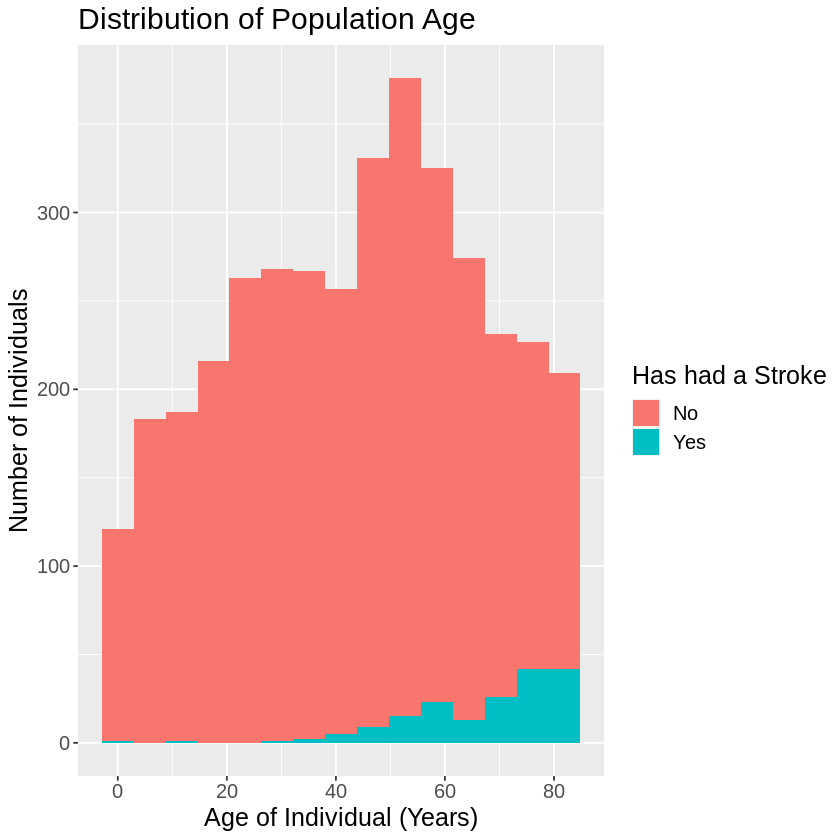

In [14]:
age_histogram_plot

<br> There is no prominent trend to show how BMI may affect the chances of stroke, as many observations that had a stroke are across most BMI values (Figure 2). Thus, BMI will likely not be a useful predictor. 


In [15]:
bmi_histogram_plot <- histogram_data |>
    ggplot(aes(x = body_mass_index, fill = stroke)) +
    geom_histogram(bins = 25) +
    xlab("BMI of Individual (kg/m^2)") +
    ylab("Number of Individuals") +
    labs(fill = "Has had a Stroke") +
    ggtitle("Distribution of Population BMI") +
    theme(text = element_text(size=15))

##### Figure 2. Histogram of Body Mass Index (BMI) across Stroke Condition

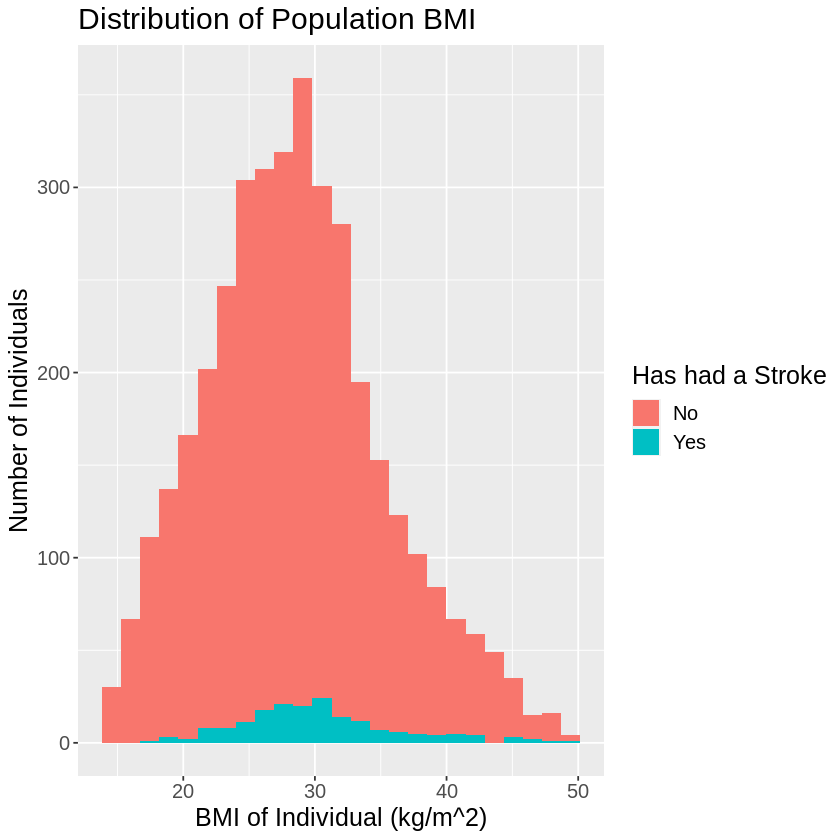

In [16]:
bmi_histogram_plot

<br> As for glucose levels, both classes have many observations outside the 120-180 mg/dL safe zone (Diabetes, 2022) (Figure 3). However, those that had a stroke have much higher average glucose levels (Table 6). Furthermore, previous studies indicated glucose levels as a risk factor for stroke (Mayo Foundation, 2022). Thus, this variable may still be a useful predictor. 

In [17]:
glucose_histogram_plot <- histogram_data |>
    ggplot(aes(x = avg_glucose_level, fill = stroke)) +
    geom_histogram(bins = 15) +
    xlab("Glucose Level (mg/dL)") +
    ylab("Number of Individuals") +
    labs(fill = "Has had a Stroke") +
    ggtitle("Distribution of Population Glucose Levels") +
    theme(text = element_text(size=15))

##### Figure 3. Histogram of Glucose Level across Stroke Condition

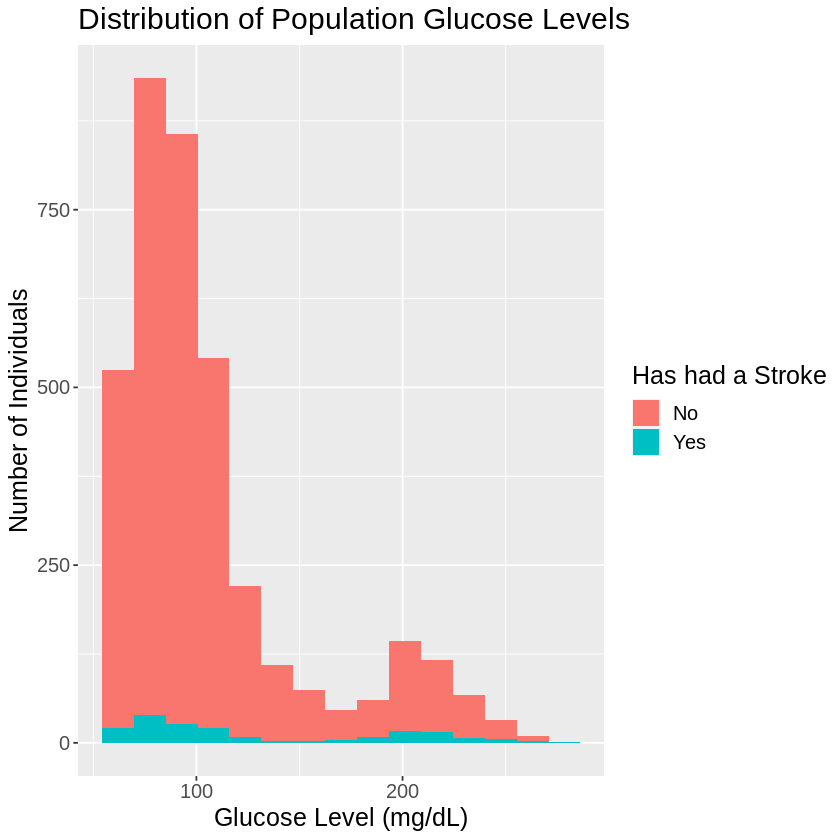

In [18]:
glucose_histogram_plot

##### Table 6. Average Glucose Level Separated by Stroke Condition 

In [19]:
select(stroke_bmi_gluc_age_avg, stroke, avg_glucose)

stroke,avg_glucose
<fct>,<dbl>
0,104.9
1,129.3


## <br> Data Analysis
With the information from summary statistics, visualizations, and previous studies, the predictor variables will be <b> age and glucose levels. 


To resolve class imbalance, we oversampled the stroke-positive class so that this group has more voting power in the KNN algorithm using `recipe()` and `step_upsample()`. The data was standardized with `step_center()` and `step_scale()` because the two predictors are on different scales (Table 1), which will affect distance calculations to the nearest neighbours.   

In [20]:
brainstroke_recipe_balanced <- 
    recipe(stroke ~ age + avg_glucose_level, data = brainstroke_training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors()) |>
    step_upsample(stroke, over_ratio = 1, skip = FALSE) 

brainstroke_recipe_balanced

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Centering for all_predictors()
Scaling for all_predictors()
Up-sampling based on stroke

In [21]:
#code for balanced data  
balanced_stroke <- brainstroke_recipe_balanced |>
prep() |>
bake(brainstroke_training)

<br> The classes are now balanced (Table 7). 

##### Table 7. Confirmation of Balanced Data 

In [22]:
#table output
balanced_stroke |>
  group_by(stroke) |>
  summarize(count = n())

stroke,count
<fct>,<int>
0,3555
1,3555


<br> To achieve potentially a better accuracy, we did a 5-fold cross-validation to choose K using `vfold_cv()`. A `dummy_recipe` was made to work around cross-validation because of upsampling.  

In [23]:
#dummy recipe to input for cross-validation
dummy_recipe <- recipe(stroke ~ age + avg_glucose_level, data = balanced_stroke)

#5-fold cross-validation on training set, if I use the balanced_stroke dataset, K=1
brainstroke_vfold <- vfold_cv(brainstroke_training, v = 5, strata = stroke)

#KNN classifier
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

#K values to test
gridvals = tibble(neighbors = seq(1, 51, by = 5))


knn_results <- workflow() |>
       add_recipe(dummy_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = brainstroke_vfold, grid = gridvals) |>
       collect_metrics()

<br> The K-value with the highest accuracy is 11 (Table 8).

##### Table 8. Cross-validation best K results

In [24]:
accuracies <- knn_results |> 
       filter(.metric == "accuracy") 

#to see which K has the highest accuracy estimate
best_accuracies <- accuracies |>
arrange(desc(mean)) |>
slice(1)

best_accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,accuracy,binary,0.9518072,5,0.003223988,Preprocessor1_Model03


<br> To ensure that K=11 is reliable in the presence of uncertainty, we made a line plot with `geom_line()` (Figure 4). 

In [25]:
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(1, 51, by = 5)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.65, 1.00)) + # adjusting the y-axis 
       theme(text = element_text(size = 20))

##### Figure 4. Scatter Plot of K Neighbours VS Accuracy Estimate

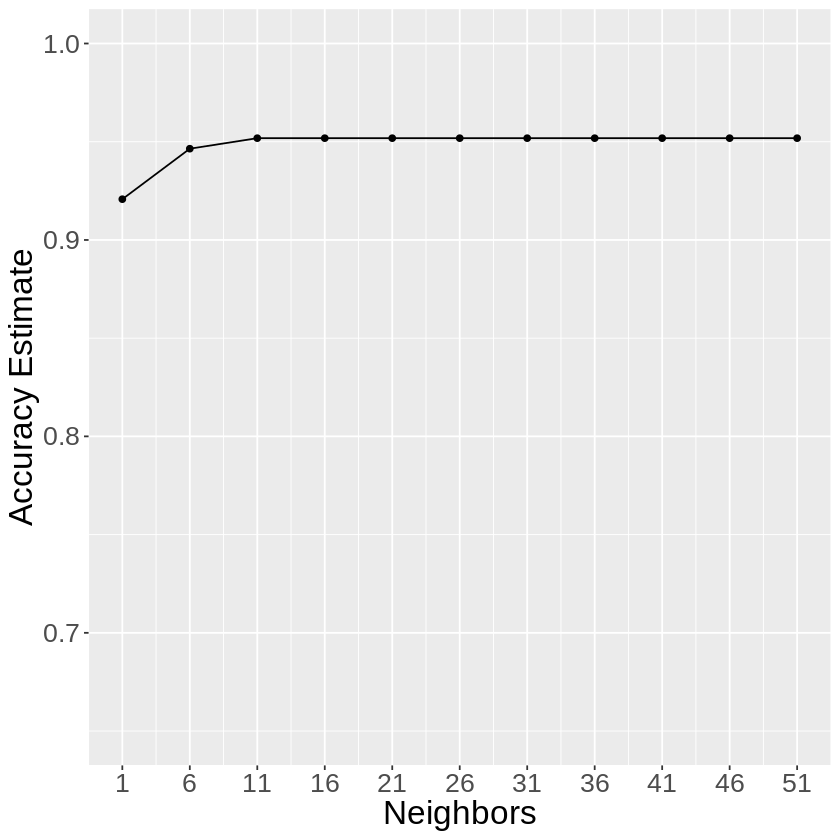

In [26]:
accuracy_versus_k

<br> As shown, changing K to a nearby value does not alter the accuracy much so we retrained the model with K=11 to build our classifier. We used `fit()`  instead of `workflow` to avoid applying `step_upsample()` to the testing data later.

In [27]:
knn_spec_accurate <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
       set_engine("kknn") |>
       set_mode("classification")

#No workflow was used to avoid applying the upsample function to the testing data later
brainstroke_fit <- knn_spec_accurate |>
fit(stroke ~ age + avg_glucose_level, data = balanced_stroke)

brainstroke_fit

parsnip model object


Call:
kknn::train.kknn(formula = stroke ~ age + avg_glucose_level,     data = data, ks = min_rows(11, data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1014065
Best kernel: rectangular
Best k: 11

<br> The testing data was standardized manually (`step_center()` + `step_scale()`) to be on the same scale as the model because it will affect distance calculations to the nearest neighbours.  Finally, we used it to test the classifier to determine its accuracy using `metrics()`.

In [28]:
#we used the training data to make the recipe because the already upsampled training data can't be scaled again 
#we made another recipe to avoid applying the recipe with the upsampling in it, to the testing data

scaled_brainstroke_testing <- recipe(stroke ~ age + avg_glucose_level, data = brainstroke_training) |>
step_scale(all_predictors()) |>
step_center(all_predictors()) |>
prep() |>
bake(brainstroke_testing)

brainstroke_test_predictions <- predict(brainstroke_fit, scaled_brainstroke_testing) |>
       bind_cols(scaled_brainstroke_testing)
brainstroke_test_predictions 

brainstroke_prediction_accuracy <- brainstroke_test_predictions |>
         metrics(truth = stroke, estimate = .pred_class) |>
         filter(.metric == "accuracy")

.pred_class,age,avg_glucose_level,stroke
<fct>,<dbl>,<dbl>,<fct>
1,1.0239152,2.72174014,1
1,1.6421478,1.77880479,1
0,0.7589584,0.31934154,1
0,0.4498421,-0.03470316,1
⋮,⋮,⋮,⋮
0,0.6706394,3.28199646,0
0,-1.8022910,1.96836854,0
0,-1.8764789,0.02101171,0
0,-0.1242311,-0.79739758,0


<br> The prediction accuracy was approximately 0.81 (Table 9). 

##### Table 9. Prediction Accuracy on Testing Data

In [29]:
brainstroke_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8073836


<br> We used `conf_mat()` to compute the confusion matrix to see the predicted and correct labels because false negatives and positives are relevant to our stroke dataset (Table 10). 

In [30]:
confusion <- brainstroke_test_predictions |>
             conf_mat(truth = stroke, estimate = .pred_class)

##### Table 10. Confusion Matrix

In [31]:
confusion

          Truth
Prediction   0   1
         0 966  28
         1 212  40

<br> Next, we made a scatter plot to observe how the classifier will predict observations (Figure 5). We first created the grid of age/glucose level values and arranged it in a data frame (`asgrid`). Then we used the fit workflow to make predictions at the grid points using `predict`. Next we used `bind_cols` to bind the predictions as a new column with the grid points. Finally, we made the coloured scatter plot with `ggplot()`. Testing data was coloured by stroke condition and the background colour depicts the class that will be predicted.

In [40]:
# created the grid of age and glucose level values, and arranged in a data frame
age_grid <- seq(min(scaled_brainstroke_testing$age), 
                max(scaled_brainstroke_testing$age), 
                length.out = 100)
glu_grid <- seq(min(scaled_brainstroke_testing$avg_glucose_level), 
                max(scaled_brainstroke_testing$avg_glucose_level), 
                length.out = 100)
asgrid <- as_tibble(expand.grid(age = age_grid, 
                                avg_glucose_level = glu_grid))

StrokePredGrid <- predict(brainstroke_fit, asgrid)

prediction_table <- bind_cols(StrokePredGrid, asgrid) |> 
rename(stroke = .pred_class)

wkflw_plot <- ggplot() +
  geom_point(data = scaled_brainstroke_testing, 
             mapping = aes(x = age, y = avg_glucose_level, color = stroke), size = 2) + 
  geom_point(data = prediction_table, mapping = aes(x = age, 
             y = avg_glucose_level, 
             color = stroke), 
             alpha = 0.02, size = 5) +
  labs(color = "Diagnosis", 
       x = "Age (years, standardized)", 
       y = "Average Glucose Level (mg/dL, standardized)") +
  scale_color_manual(labels = c("No Stroke", "Stroke"), 
                     values = c("lightsalmon", "cornflowerblue")) +
  theme(text = element_text(size = 20))

##### Figure 5. Scatter Plot of KNN Classifier Prediction Accuracy

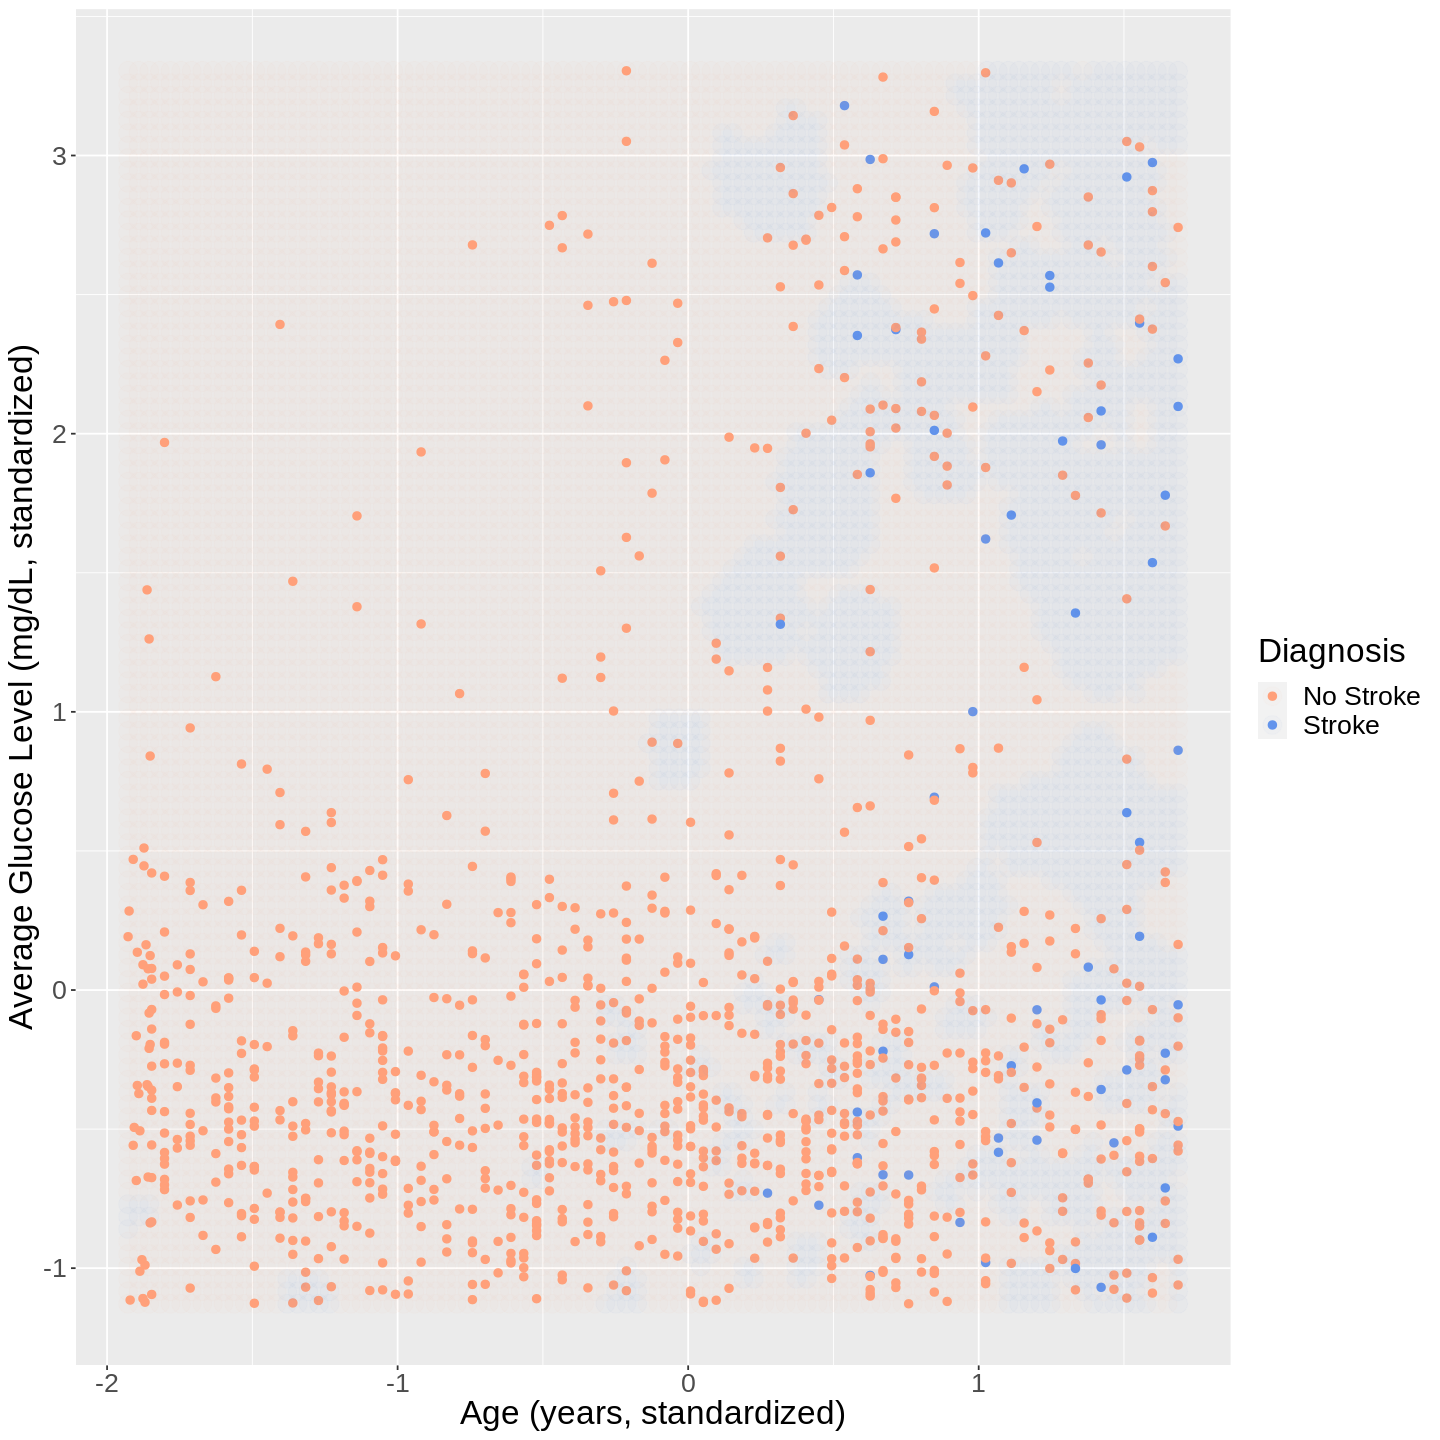

In [41]:
wkflw_plot

<br> We visualized prediction accuracy on the testing data by showing correct predictions in separate colours and wrong predictions as circles to assess if there is a trend in the inaccurate predictions (Figure 6). 

In [36]:
#make a new column for correct and incorrect predictions
correct_data <- brainstroke_test_predictions |>
mutate(correct = (.pred_class == stroke))

options(repr.plot.width = 12, repr.plot.height = 12) 

wrong_plot <- ggplot() + 
geom_point(data = correct_data, aes(x = age, y = avg_glucose_level, color = stroke, shape = correct), size = 5) + 
scale_shape_manual(values =c(7, 20))+
labs(color = "Correct Predictions", x = "Age (years, standardized)", y = "Average Glucose Level (mg/dL, standardized)") +
scale_color_manual(labels = c("No Stroke", "Stroke"), 
                     values = c("lightsalmon", "cornflowerblue")) +
theme(text = element_text(size = 20)) +
theme(legend.text = element_text(size=20))

##### Figure 6. Scatter Plot Indicating Wrong Predictions in Black

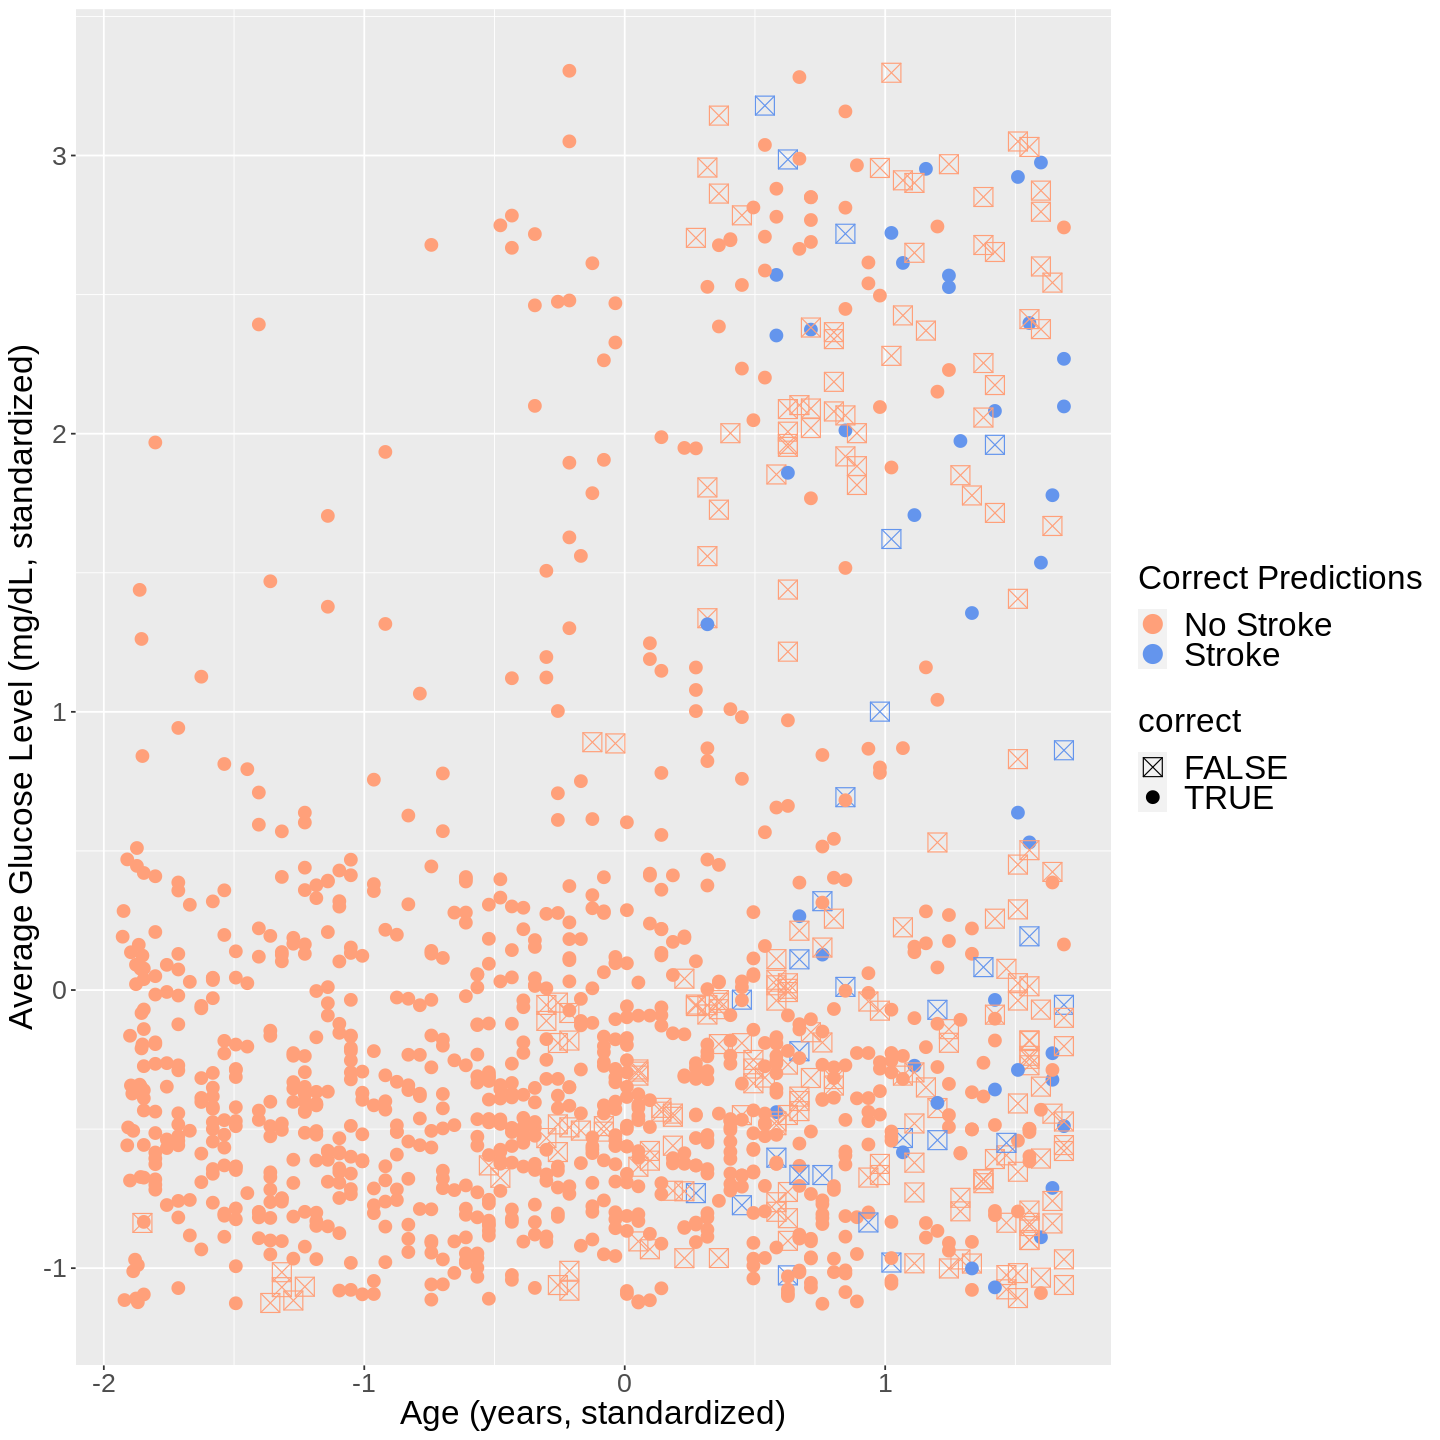

In [37]:
wrong_plot

## <br> Discussion 

As seen from table 4, 95% of the stroke dataset includes “no stroke” observations. This class imbalance poses a problem for the KNN algorithm as it relies on majority voting. Due to the overwhelming number of data points in the “no stroke” category, the classifier may be more likely to predict this label, even if it is not accurate. In an attempt to address this issue, we performed upsampling. However, we recognize that this will cause drawbacks with cross-validation because validation sets likely won’t be accurate as some duplicates will end up in the training and validating sets. To overcome this limitation, we had to make a dummy recipe. Furthermore, upsampling may cause a fundamental problem of overfitting the model because it makes exact copies of the stroke-positive class observations. As such, it was expected that the cross-validation accuracy was high at 0.95 (Table 8), indicating that the classifier performed well on the training data. To further support our point, our model predicted patient stroke status in the testing data with an accuracy of 0.81 (Table 9) which is lower than the cross-validation accuracy. Although this is not a significant decline, it nevertheless supports our prediction that the model’s ability to generalize to new data may be limited.

The impact of upsampling was also observed in figure 5. The jagged boundaries around the blue regions indicate a less simple model that likely resulted from overfitting. When we examine the model’s performance on testing data, we observe that the region classified as stroke-positive is predominantly located in the upper ranges of both age and glucose levels. Notably, some “no stroke” data points are within the blue background. Although there are more non-stroke data points in this region, the classifier predicts them as stroke-positive due to the effect of upsampling. Figure 6 provides further support for this observation as a majority of the incorrect predictions occur in this region. Interestingly, most of the incorrect predictions coincide with areas where our classifier is diagnosing for stroke-positives. This is because upsampling increases the voting power of any single blue point. In the lower right region, there are many non-stroke observations. However, due to the occasional stroke-positive data point, the stroke-negative points in the area are incorrectly classified.

If the testing data accurately represents the population and there is a serious class imbalance, there will likely be a substantial number of false positives for people with higher age and glucose levels. Specifically, 17% of false positives resulted from the testing data (Table 10). However, it's worth noting that false positives are not overly concerning as individuals can undergo medical examinations to determine if they are at risk. Contrastingly, false negatives are critical since they can result in patients not receiving timely medical attention. While false negatives only account for 2% of the testing data (Table 10), it’s important to consider the heavily imbalanced dataset. Of the 68 stroke-positive cases, 40% were incorrectly classified as non-stroke, highlighting our model’s lack of accuracy. 

Despite the limitations of this model, our findings still provide context that age and glucose levels are important aspects to consider when predicting stroke. While it remains unclear whether the class imbalance is present in real-life, our study demonstrates the need to be aware of its potential to result in false predictions in KNN classification especially if using upsampling. Future analyses should aim to address the class imbalance issue by using a more balanced dataset or implementing other functions to better balance the data. These findings can help people make better lifestyle choices such as controlling their sugar levels and increase awareness to improve treatment and diagnosis for high-risk individuals. Our analysis demonstrates the potential of using a patient’s medical history, with reference to age and glucose level, to determine their risk of stroke. Identifying relevant predictors may provide insight into developing new treatment targets that decrease the risk of stroke and enable potential patients to take preventive measures. Future research can explore more health factors such as hypertension, and lifestyle factors such as smoking to predict stroke and improve the accuracy of stroke prediction models. 


## <br> References

Akbasli, I. T. (2022, July 16). Brain stroke prediction dataset. Kaggle. Retrieved March 11, 2023, from https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset?select=full_data.cs

Bariatric Department. (2019, March 26). How obesity affects stroke risk. Ochsner Lafayette General. Retrieved April 7, 2023, from https://ochsnerlg.org/about-us/news/how-obesity-affects-stroke-risk#:~:text=The%20link%20between%20excess%20weight,of%20stroke%20by%205%20percent. 

Diabetes. Stroke Association. (2022, October 21). Retrieved April 2, 2023, from https://www.stroke.org.uk/what-is-stroke/are-you-at-risk-of-stroke/diabetes#:~:text=Diabetes%20means%20you%20have%20too,Make%20blood%20vessels%20become%20stiff. 

Mayo Foundation for Medical Education and Research. (2022, January 20). Stroke. Mayo Clinic. Retrieved March 11, 2023, from https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113#:~:text=A%20stroke%20can%20sometimes%20cause,or%20loss%20of%20muscle%20movement. 

Risk factors for stroke. Risk Factors for Stroke | Johns Hopkins Medicine. (2022, December 13). Retrieved March 31, 2023, from https://www.hopkinsmedicine.org/health/conditions-and-diseases/stroke/risk-factors-for-stoke 

The top 10 causes of death. World Health Organization. (2020). Retrieved April 2, 2023, from https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death#:~:text=Stroke%20and%20chronic%20obstructive%20pulmonary,4th%20leading%20cause%20of%20death. 

U.S. Department of Health and Human Services. (n.d.). Brain basics: Preventing stroke. National Institute of Neurological Disorders and Stroke. Retrieved March 11, 2023, from https://www.ninds.nih.gov/health-information/public-education/brain-basics/brain-basics-preventing-stroke 